In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2022-06-26 21:19:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K  1.31MB/s    in 0.3s    

2022-06-26 21:19:21 (1.31 MB/s) - ‘bank-additional.zip’ saved [444572/444572]



In [3]:
!unzip -o -q bank-additional.zip

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 6)

import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option("precision", 2)
pd.options.display.float_format = '{:.2f}'.format

In [6]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep = ';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [7]:
df.shape

(41188, 21)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


In [11]:
df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [12]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [13]:
df["marital"].value_counts()


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [14]:
df["marital"].value_counts(normalize = True)

married    0.61
single     0.28
divorced   0.11
unknown    0.00
Name: marital, dtype: float64

In [15]:
df.sort_values(by = "duration", ascending = False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,...,1,999,0,nonexistent,-0.10,93.20,-42.00,4.41,5195.80,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,...,3,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,...,1,999,0,nonexistent,-1.70,94.03,-38.30,0.89,4991.60,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,...,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,yes


In [16]:
df.sort_values(by = ["age", "duration"], ascending = [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,...,1,2,2,success,-3.40,92.43,-26.90,0.74,5017.50,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,...,2,999,1,failure,-2.90,92.20,-31.40,0.87,5076.20,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,...,3,4,2,success,-2.90,92.20,-31.40,0.88,5076.20,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,2,999,2,failure,-2.90,92.20,-31.40,0.87,5076.20,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,...,3,4,2,success,-2.90,92.20,-31.40,0.87,5076.20,no


In [17]:
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

In [18]:
d = {"no": 0, "yes": 1}
df["y"] = df["y"].map(d)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0


In [19]:
print("Share of attracted clients =", '{:.1%}'.format(df["y"].mean()))

Share of attracted clients = 11.3%


In [20]:
df[df["y"] == 1].mean()

age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64

In [21]:
acd = round(df[df["y"] == 1]["duration"].mean(), 2)
acd_in_min = acd // 60
print("Average call duration for attracted clients =", acd_in_min, "min", int(acd) % 60, "sec")

Average call duration for attracted clients = 9.0 min 13 sec


In [22]:
print("Average age of attracted clients =", int(df[(df["y"] == 1) & (df["marital"] == "single")]["age"].mean()), "years")

Average age of attracted clients = 31 years


In [23]:
df[-1:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.10,94.77,-50.80,1.03,4963.60,0


In [24]:
pd.crosstab(df["y"], df["marital"])

marital,divorced,married,single,unknown
y,,,,
0,4136,22396,9948,68
1,476,2532,1620,12


In [25]:
pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.11,0.61,0.27,0.00
1,0.10,0.55,0.35,0.00


In [26]:
df.pivot_table(
    ["age", "duration"],
    ["job"],
    aggfunc = "mean",
).head(10)

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


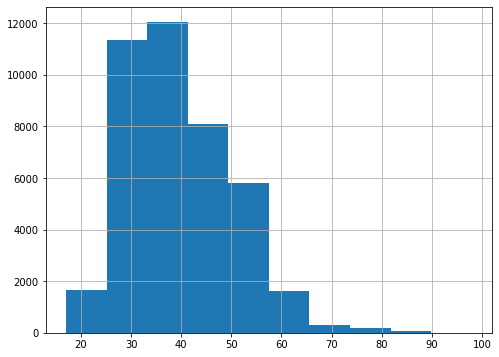

In [27]:
df["age"].hist()

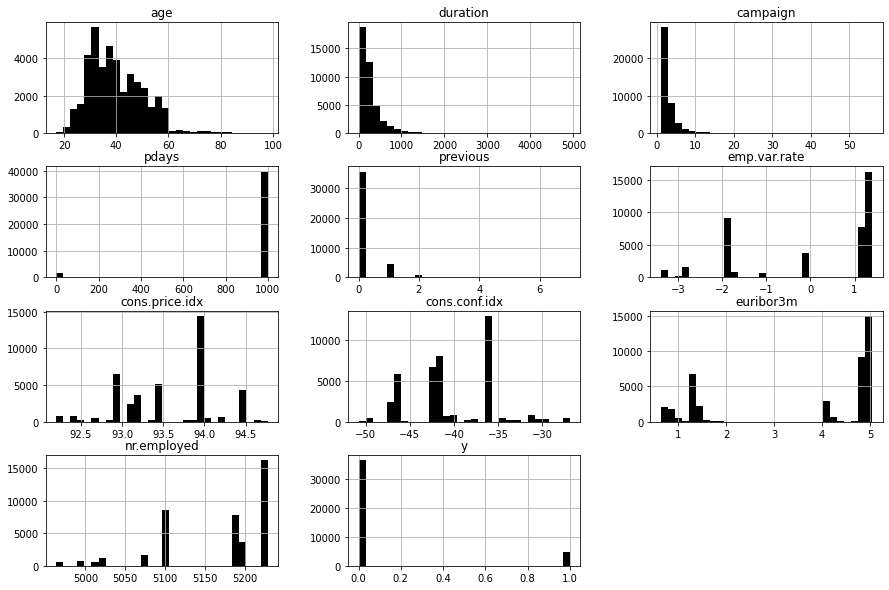

In [28]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

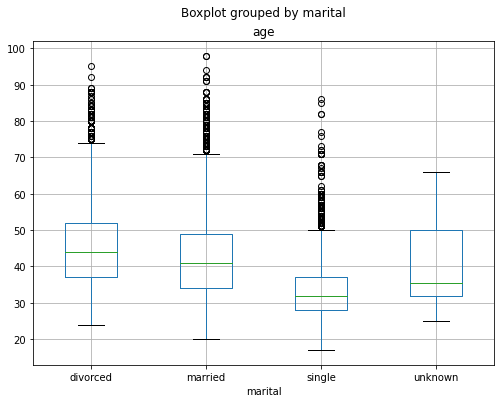

In [29]:
df.boxplot(column = "age",
           by = "marital")
plt.show()

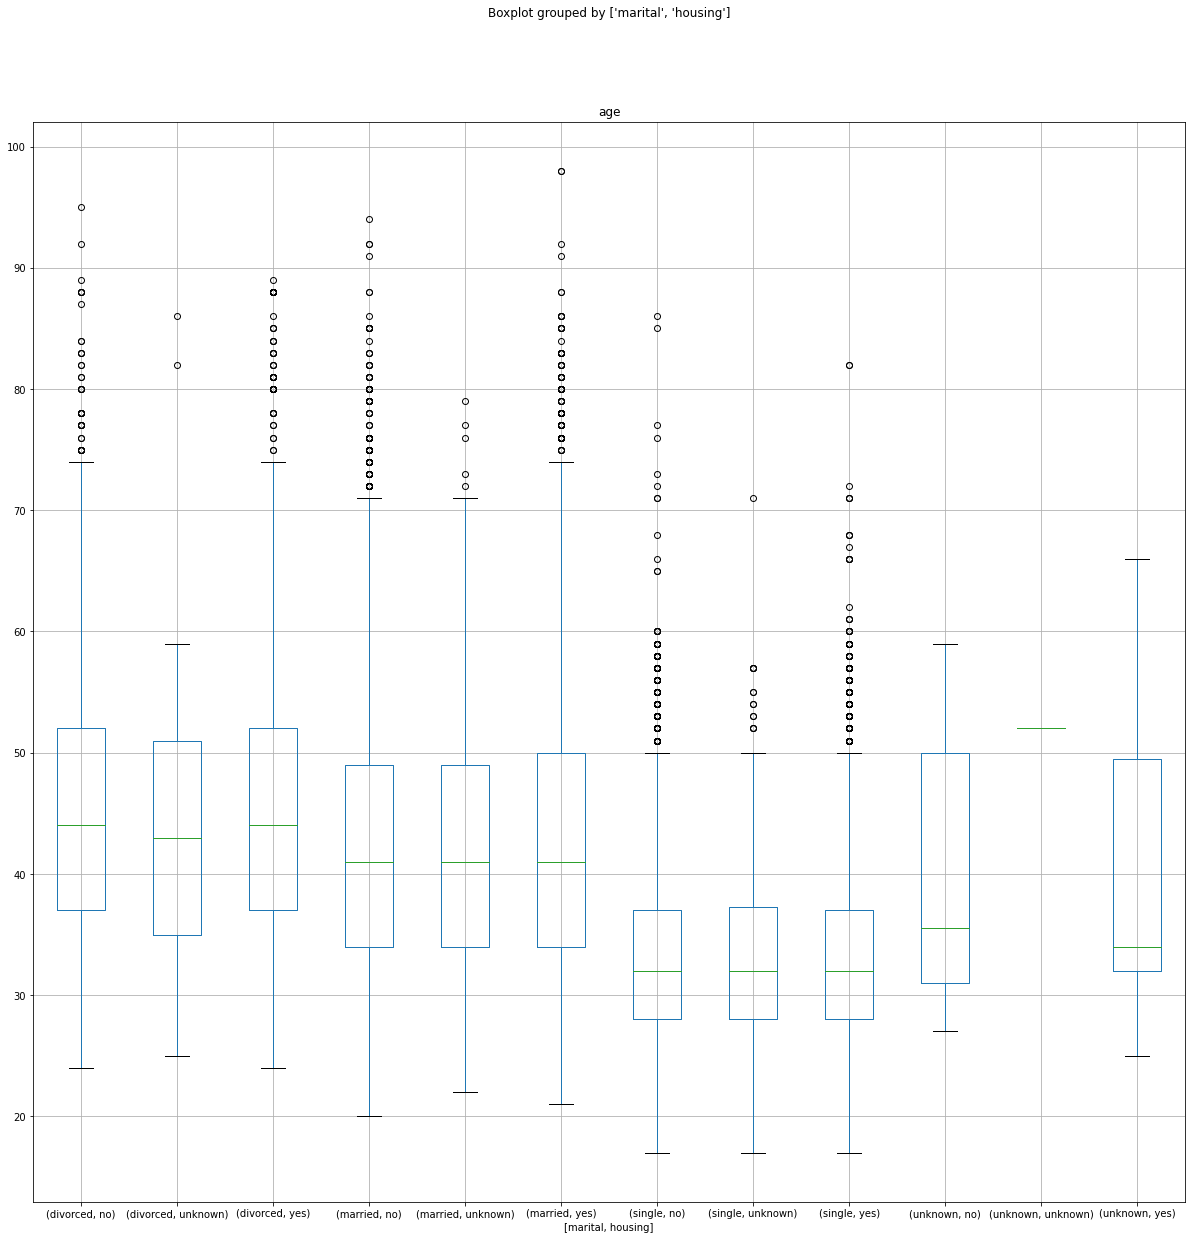

In [30]:
df.boxplot(column = "age",
           by = ["marital", "housing"],
           figsize = (20, 20))

In [31]:
df.sort_values(by = "campaign", ascending = False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,...,56,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,...,43,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,...,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,...,41,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,...,40,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,...,40,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,...,39,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11593,43,technician,married,high.school,no,yes,no,telephone,jun,fri,...,37,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0


In [32]:
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc = ["mean", "count"],
)

mean           count         
                      age campaign    age campaign
education                                         
basic.4y            47.60     2.60   4176     4176
basic.6y            40.45     2.56   2292     2292
basic.9y            39.06     2.53   6045     6045
high.school         38.00     2.57   9515     9515
illiterate          48.50     2.28     18       18
professional.course 40.08     2.59   5243     5243
university.degree   38.88     2.56  12168    12168
unknown             43.48     2.60   1731     1731

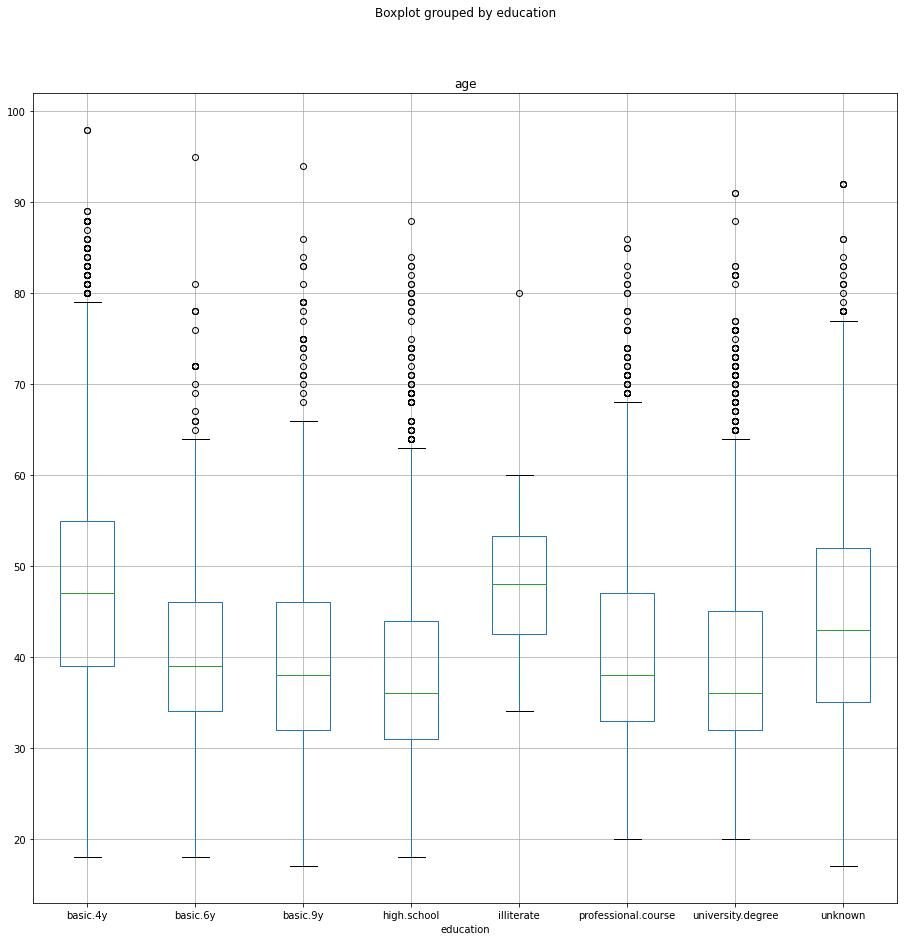

In [33]:
df.boxplot(column = "age",
  by = "education",
  figsize = (15, 15))